In [12]:
for i in range(0, 22, 1):
    filename = (str(i) + ".inp")
    target = open(filename, 'w+')
    pos = 3.918873 * (i / 20)
    target.write("""opti conp comp defe
cell
3.918873 3.918873 3.918873 90.0 90.0 90.0
frac
Cl core 0.5 0.5 0.5
O core 0 0 0
Cl shel 0.5 0.5 0.5
O shel 0 0 0
Li core 0.5 0 0
space
221
""")
    target.write("centre cart " + str(pos) + " " + str(pos) + " 0")
    target.write("""
size 20 24
vacancy cart 0 0 0
vacancy cart 3.918873 3.918873 0
""")
    target.write("intersitial O cart " + str(pos) + " " + str(pos) + " 0 fix")
    target.write("""
species
Li core 1.000
O core 0.183
O shel -2.183
Cl core 1.485
Cl shel -2.485
spring
O 593.7200
Cl 29.3800
buckingham
Li core Li core 360.53 0.1610 0 0 12
Li core O shel 292.30 0.3472 0 0 12
Li core Cl shel 421.04 0.3340 0 0 12
O shel O shel 22764.30 0.1490 13.19 0 12
O shel Cl shel 8286.91 0.2590 62.20 0 12
Cl shel Cl shel 1227.20 0.3210 14.53 0 12
dump Li3OCl.grs
""")
    
magic = open('input.txt', 'w+')

for i in range(0, 21, 1):
    magic.write('gulp < ' + str(i) + '.inp > ' + str(i) + '.out; ')
    
magic.close()

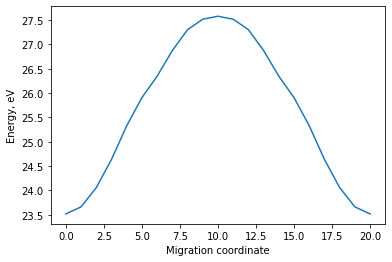

In [5]:
from matplotlib import pyplot as plt
import re
import glob
import numpy as np

position, energy = [], []

data = glob.glob('*.out')

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

for f in data:
    position.append(float(f.strip('.out')))
    energy.append(getEnergy(f))

energies = np.array(energy)
positions = np.array(position)
idx   = np.argsort(positions)

energies = np.array(energies)[idx]
positions = np.array(positions)[idx]

plt.plot(positions, energies)
plt.ylim()
plt.xlabel('Migration coordinate')
plt.ylabel('Energy, eV')
plt.savefig('/home/ben/Documents/gulp/summary/li3ocl_o_mig.jpg', bbox_inches='tight', dpi=500)